In [145]:
# HOMEWORK - 12: NATURAL LANGUAGE PROCESSING


In [146]:
# import necessities
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()
import json

In [147]:
# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [148]:
# Reading the News API key environment variable
api_key = 'b38044ee9fe84417ab055b7b8c329cca'
# api_key = os.getenv("NEWS_API_KEY")

type(api_key)

str

In [149]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [150]:
# Fetch top news articles about Bitcoin
bitcoin_headlines = newsapi.get_everything(q='bitcoin',
                                          language='en'
                                           )

# bitcoin_headlines
bitcoin_strg_headlines = json.dumps(bitcoin_headlines)

In [151]:
# Fetch top news articles about Ethereum
ethereum_headlines = newsapi.get_everything(q="ethereum",
                                               language="en"
                                           )
# ethereum_headlines
ethereum_strg_headlines = json.dumps(ethereum_headlines)

In [152]:
# create bitcoin sentiment scores dataframe
bitcoin_sentiments = []

for article in bitcoin_headlines['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        bitcoin_sentiments.append({
            'text': text, 
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })
        
    except AttributeError:
        pass

bitcoin_df = pd.DataFrame.from_dict(bitcoin_sentiments)
cols = ['compound', 'negative', 'neutral', 'positive', 'text']
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head(20)


,compound,negative,neutral,positive,text
0,0.0258,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...
1,0.0000,0.000,1.000,0.000,Most of these accounts tweeted some variant of...
2,0.0772,0.000,0.962,0.038,Reuters had previously reported the FBI would ...
3,0.5994,0.000,0.851,0.149,Our investigation and cooperation with law enf...
4,0.6369,0.000,0.860,0.140,The bitcoin bulls are back in town.\r\nThe pri...
5,0.1779,0.057,0.866,0.078,The company blacklisted the bitcoin address\r\...
6,-0.8804,0.247,0.753,0.000,Bitcoin scams are causing a lot of headaches r...
7,-0.6808,0.153,0.847,0.000,"Much as with Twitter, the YouTube scams use Wo..."
8,0.1280,0.000,0.951,0.049,Image copyrightAFP/REUTERSImage caption\r\n Ki...
9,-0.8689,0.277,0.687,0.036,A number of high-profile Twitter accounts were...


In [153]:
# create ethereum sentiment scores dataframe
ethereum_sentiments = []

for article in ethereum_headlines['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        ethereum_sentiments.append({
            'text': text, 
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })
        
    except AttributeError:
        pass

ethereum_df = pd.DataFrame.from_dict(ethereum_sentiments)
cols2 = ['compound', 'negative', 'neutral', 'positive', 'text']
ethereum_df = ethereum_df[cols2]
ethereum_df.head(20)

,compound,negative,neutral,positive,text
0,0.5719,0.000,0.868,0.132,According to a public letter from the U.S. Com...
1,0.2263,0.000,0.947,0.053,"When the inventor of AWS Lambda, Tim Wagner, a..."
2,-0.6808,0.177,0.823,0.000,Enlarge/ A screenshot from Wozniak's lawsuit s...
3,0.0000,0.000,1.000,0.000,Crypto has been on a tear in the last week.\r\...
4,-0.4215,0.083,0.917,0.000,"<ul><li>Bitcoin crossed the $11,000 level and ..."
5,0.3612,0.051,0.847,0.102,Interest in bitcoin and other cryptocurrencies...
6,-0.3400,0.088,0.912,0.000,"Lightweight, open-source, universal paper wall..."
7,-0.4519,0.130,0.810,0.060,Getty\r\nYou have to use phrases like Ethereum...
8,0.5719,0.058,0.780,0.163,Many who are new to crypto assume that there w...
9,-0.6486,0.122,0.878,0.000,getty\r\nEvery computer operating system needs...


In [154]:
# describe bitcoin sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.214625,0.090200,0.863800,0.046000
std,0.462797,0.084929,0.077649,0.044974
min,-0.880400,0.000000,0.687000,0.000000
25%,-0.629500,0.000000,0.834250,0.000000
50%,-0.235650,0.073500,0.858500,0.044000
75%,0.089900,0.145500,0.919500,0.066250
max,0.636900,0.277000,1.000000,0.149000


In [155]:
# describe ethereum sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,17.000000,17.000000,17.000000,17.000000
mean,0.100971,0.059235,0.860824,0.080000
std,0.493485,0.058487,0.092291,0.083301
min,-0.680800,0.000000,0.660000,0.000000
25%,-0.340000,0.000000,0.814000,0.000000
50%,0.226300,0.058000,0.868000,0.060000
75%,0.571900,0.102000,0.917000,0.136000
max,0.726900,0.177000,1.000000,0.226000


In [156]:
type(bitcoin_headlines)

dict

In [157]:
# TOKENIZER
# import necessities

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [158]:
# tokenizer function
lemmatizer = WordNetLemmatizer()

def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens


In [159]:
# bitcoin tokenized
bitcoin_processed = set(tokenizer(bitcoin_strg_headlines))
# print(set(tokenizer(bitcoin_strg_headlines)))

In [160]:
# bitcoin tokens 
bitcoin_tokens_df = pd.DataFrame({'Bitcoin Tokens': bitcoin_processed})
bitcoin_tokens_df.head(50)

,Bitcoin Tokens
0,"{apparently, httpsmashablecomarticlejohnmcafee..."
1,"{apparently, httpsmashablecomarticlejohnmcafee..."
2,"{apparently, httpsmashablecomarticlejohnmcafee..."
3,"{apparently, httpsmashablecomarticlejohnmcafee..."
4,"{apparently, httpsmashablecomarticlejohnmcafee..."
5,"{apparently, httpsmashablecomarticlejohnmcafee..."
6,"{apparently, httpsmashablecomarticlejohnmcafee..."
7,"{apparently, httpsmashablecomarticlejohnmcafee..."
8,"{apparently, httpsmashablecomarticlejohnmcafee..."
9,"{apparently, httpsmashablecomarticlejohnmcafee..."


In [161]:
# ethereum tokenized
ethereum_processed = set(tokenizer(ethereum_strg_headlines))
# print(set(tokenizer(ethereum_strg_headlines)))

In [162]:
# ethereum tokens 
ethereum_tokens_df = pd.DataFrame({'Ethereum Tokens': ethereum_processed})
ethereum_tokens_df.head(50)

,Ethereum Tokens
0,{httpsarstechnicacomtechpolicywozsuesyoutubeov...
1,{httpsarstechnicacomtechpolicywozsuesyoutubeov...
2,{httpsarstechnicacomtechpolicywozsuesyoutubeov...
3,{httpsarstechnicacomtechpolicywozsuesyoutubeov...
4,{httpsarstechnicacomtechpolicywozsuesyoutubeov...
5,{httpsarstechnicacomtechpolicywozsuesyoutubeov...
6,{httpsarstechnicacomtechpolicywozsuesyoutubeov...
7,{httpsarstechnicacomtechpolicywozsuesyoutubeov...
8,{httpsarstechnicacomtechpolicywozsuesyoutubeov...
9,{httpsarstechnicacomtechpolicywozsuesyoutubeov...


In [163]:
# NGRAMS AND FREQUENCY ANALYSIS


In [164]:
# import necessities
from collections import Counter
from nltk import ngrams

In [165]:
# bitcoin n-grams where n=2
bitcoin_counts = Counter(ngrams(bitcoin_processed, n=2))
# print(dict(bitcoin_counts))


In [166]:
# ethereum n-grams where n=2
ethereum_counts = Counter(ngrams(ethereum_processed, n=2))
# print(dict(ethereum_counts))


In [167]:
# generate the top 10 words for each coin
# create token count function
def token_count(tokens, n=10):
    return Counter(tokens).most_common(n)


In [168]:
# top 10 words in bitcoin
print(token_count(bitcoin_counts))

[(('apparently', 'httpsmashablecomarticlejohnmcafeebitcointhreeyearbet'), 1), (('httpsmashablecomarticlejohnmcafeebitcointhreeyearbet', 'httpswwwcnncomtechtwitterhackelonmuskbillgatesindexhtml'), 1), (('httpswwwcnncomtechtwitterhackelonmuskbillgatesindexhtml', 'onu'), 1), (('onu', 'confirmed'), 1), (('confirmed', 'opportunity'), 1), (('opportunity', 'hit'), 1), (('hit', 'null'), 1), (('null', 'addressrnillustration'), 1), (('addressrnillustration', 'yet'), 1), (('yet', 'title'), 1)]


In [169]:
# top 10 words in ethereum
print(token_count(ethereum_counts))

[(('httpsarstechnicacomtechpolicywozsuesyoutubeoverbitcoingiveawayscamvideosusinghisname', 'dale'), 1), (('dale', 'developer'), 1), (('developer', 'sanctions'), 1), (('sanctions', 'opportunity'), 1), (('opportunity', 'null'), 1), (('null', 'donald'), 1), (('donald', 'become'), 1), (('become', 'contributing'), 1), (('contributing', 'title'), 1), (('title', 'price'), 1)]


In [170]:
# Word Clouds

In [171]:
# import necessities
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [172]:
# process text for word cloud creation
bitcoin_big_string = ' '.join(bitcoin_processed)
ethereum_big_string = ' '.join(ethereum_processed)


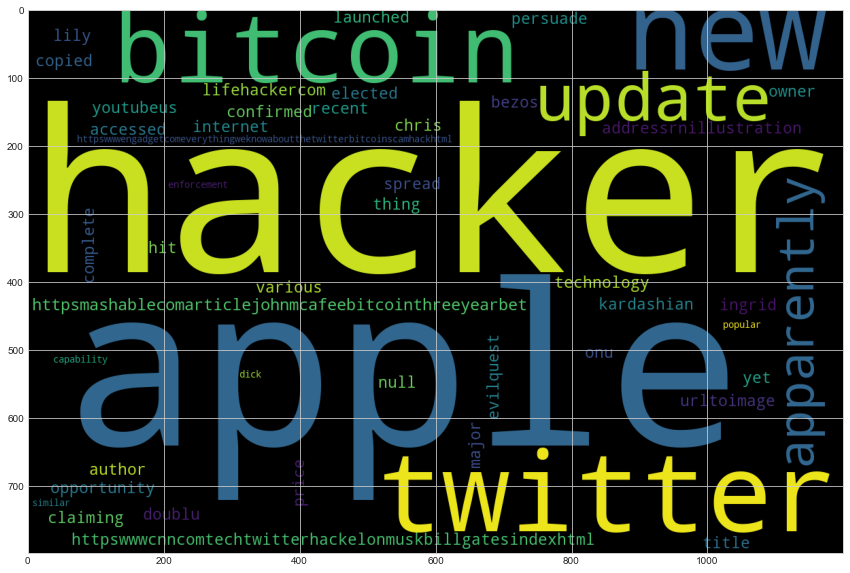

In [173]:
# bitcoin word cloud
bitcoin_wc = WordCloud(width=1200,
                      height=800,
                      max_words=50).generate(bitcoin_big_string)
plt.imshow(bitcoin_wc)

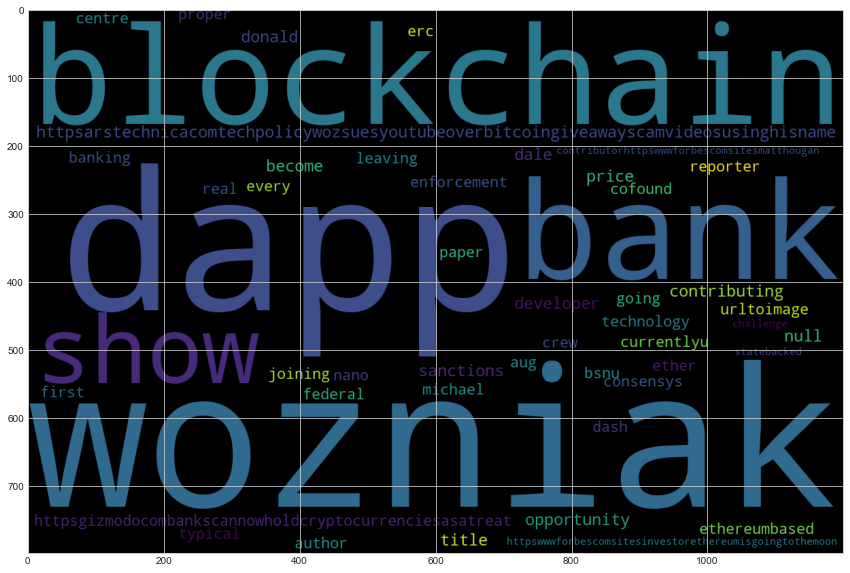

In [174]:
# ethereum word cloud
ethereum_wc = WordCloud(width=1200,
                       height=800,
                       max_words=50).generate(ethereum_big_string)
plt.imshow(ethereum_wc)

In [175]:
# named entity recognition

In [176]:
# import necessities
import spacy
from spacy import displacy

In [177]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [178]:
# concatenate all bitcoin text together
bitcoin_doc = nlp(bitcoin_strg_headlines)
print(bitcoin_doc)

{"status": "ok", "totalResults": 4960, "articles": [{"source": {"id": "engadget", "name": "Engadget"}, "author": "Violet Blue", "title": "Twitter's Bitcoin hackers had almost limitless access", "description": "On Wednesday, July 15, Twitter was the target of a very public hack attack that\u2019s still sending shockwaves across the internet. In what is a major security breach for the company, a handful of the most-followed Twitter accounts belonging to some of the world\u2019\u2026", "url": "https://www.engadget.com/twitter-bitcoin-scam-social-engineering-hack-access-193040357.html", "urlToImage": "https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-07%2Fca68c900-c85d-11ea-b9df-6238180027a8&client=amp-blogside-v2&signature=9b0fbb183070e467429323ab75f41cbbe1c8dbc3", "publishedAt": "2020-07-17T19:30:40Z", "content": "Just hackers burning up 0day like it\u2019s a fire sale\r\nImagine g

In [179]:
# Render visualization with title
bitcoin_doc.user_data['title'] = 'Bitcoin NER Display'
displacy.render(bitcoin_doc, style='ent')

In [180]:
# bitcoin ner - list all entities
bitcoin_entities = []
bitcoin_labels = []
for ent in bitcoin_doc.ents:
    bitcoin_entities.append(ent)
    bitcoin_labels.append(ent.label_)

bitcoin_entities_df = pd.DataFrame({'Entities': bitcoin_entities, 'Labels': bitcoin_labels})
bitcoin_entities_df.head(50)

,Entities,Labels
0,(4960),CARDINAL
1,"(Violet, Blue)",WORK_OF_ART
2,(Twitter),ORG
3,(Bitcoin),GPE
4,"(Wednesday, ,, July, 15)",DATE
5,(Twitter),ORG
6,(that\u2019s),ORG
7,(Twitter),ORG
8,(publishedAt),CARDINAL
9,"(2020, -, 07, -, 17T19:30:40Z)",DATE


In [181]:
# concatenate all ethereum text together
ethereum_doc = nlp(ethereum_strg_headlines)
print(ethereum_doc)

{"status": "ok", "totalResults": 1007, "articles": [{"source": {"id": null, "name": "Gizmodo.com"}, "author": "John Biggs", "title": "Banks Can Now Hold Cryptocurrencies, As a Treat", "description": "According to a public letter from the U.S. Comptroller of the Currency, the federal group responsible for the security of the banking system, banks are now allowed to hold cryptocurrencies.Read more...", "url": "https://gizmodo.com/banks-can-now-hold-cryptocurrencies-as-a-treat-1844473085", "urlToImage": "https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/ur0b3oxdebji9s0boue7.jpg", "publishedAt": "2020-07-22T21:45:00Z", "content": "According to a public letter from the U.S. Comptroller of the Currency, the federal group responsible for the security of the banking system, banks are now allowed to hold cryptocurrencies.\r\nThis doe\u2026 [+1760 chars]"}, {"source": {"id": "techcrunch", "name": "TechCrunch"}, "author": "Frederic Lard

In [182]:
# Render ethereum visualization with title
ethereum_doc.user_data['title'] = 'Ethereum NER Display'
displacy.render(ethereum_doc, style='ent')

In [183]:
# ethereum ner - list all entities
ethereum_entities = []
ethereum_labels = []
for ent in ethereum_doc.ents:
    ethereum_entities.append(ent)
    ethereum_labels.append(ent.label_)

ethereum_entities_df = pd.DataFrame({'Entities': bitcoin_entities, 'Labels': bitcoin_labels})
ethereum_entities_df.head(50)

,Entities,Labels
0,(4960),CARDINAL
1,"(Violet, Blue)",WORK_OF_ART
2,(Twitter),ORG
3,(Bitcoin),GPE
4,"(Wednesday, ,, July, 15)",DATE
5,(Twitter),ORG
6,(that\u2019s),ORG
7,(Twitter),ORG
8,(publishedAt),CARDINAL
9,"(2020, -, 07, -, 17T19:30:40Z)",DATE
